In [14]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

## Préliminaires

$$
\min_{(x_1,x_2)\in K} x_1^2+x_2^2-14x_1-6x_2-7,
\quad
K={x_1+x_2\le2,;x_1+2x_2\le3}.
$$
La fonction objectif s’écrit
$$
(x_1-7)^2+(x_2-3)^2-65,
$$
ce qui correspond à la projection de $(7,3)$ sur $K$.
Le minimum est atteint en :
$$
(x_1^*,x_2^*)=(3,-1),\qquad f^*=-33.
$$


In [15]:
m = GEKKO(remote=False)

x1 = m.Var(value=0)
x2 = m.Var(value=0)

m.Equation(x1 + x2 <= 2)
m.Equation(x1 + 2*x2 <= 3)

m.Minimize(x1**2 + x2**2 - 14*x1 - 6*x2 - 7)

m.options.SOLVER = 3
m.solve(disp=False)

x1v = x1.value[0]
x2v = x2.value[0]
f_opt = x1v**2 + x2v**2 - 14*x1v - 6*x2v - 7

print("x1 =", x1.value[0])
print("x2 =", x2.value[0])
print('f*  =', f_opt)

x1 = 3.0
x2 = -1.0
f*  = -33.0


## Problèmes de contrôle optimal à résoudre numériquement

### Problème de temps minimal. (contrôle d’un tram, 1ère version) 

In [16]:
nt = 101
W  = 1e5

In [17]:
m = GEKKO(remote=False)
m.time = np.linspace(0,1,nt)

x = m.Var(value=0.0)
y = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=2.0, lb=0.1, ub=10.0)
T.STATUS = 1

u = m.MV(value=0.0, lb=-1.0, ub=1.0)
u.STATUS = 1

m.Equation(x.dt() == T*y)
m.Equation(y.dt() == T*u)

m.Minimize(W * (final*x)**2)
m.Minimize(W * (final*(y+1))**2)

m.Minimize(T)

m.options.IMODE  = 6
m.options.SOLVER = 3
m.solve(disp=False)

T* = 0.76823916669
x(T) = -0.2980466657
y(T) = -0.76823916669


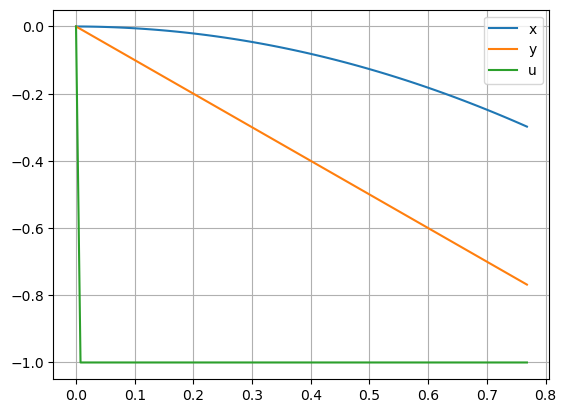

In [18]:
print("T* =", T.value[0])
print("x(T) =", x.value[-1])
print("y(T) =", y.value[-1])

t = np.linspace(0, T.value[0], nt)

plt.plot(t, x.value, label='x')
plt.plot(t, y.value, label='y')
plt.plot(t, u.value, label='u')
plt.legend(); plt.grid(); plt.show()

### Problème de temps minimal. (contrôle d’un tram, 2ème version). 

In [19]:
alpha = 0.5
eps   = 0.1
W     = 1e5
nt    = 201

In [20]:
m = GEKKO(remote=False)
m.time = np.linspace(0,1,nt)

x = m.Var(value=0.0)
y = m.Var(value=0.0)
z = m.Var(value=0.0, lb=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=2.0, lb=0.1, ub=20.0)
T.STATUS = 1

u = m.MV(value=0.0, lb=-1.0, ub=1.0)
u.STATUS = 1

m.Equation(x.dt() == T*y)
m.Equation(y.dt() == T*u)
m.Equation(z.dt() == T*0.5*(x**2 + y**2))

m.Minimize(W*(final*x)**2)
m.Minimize(W*(final*m.max2(0, y+1-eps))**2)
m.Minimize(W*(final*m.max2(0, -y-1-eps))**2)

m.Minimize(alpha*T)
m.Minimize((1-alpha)*(final*z))

m.options.IMODE  = 6
m.options.SOLVER = 3
m.solve(disp=False)

T* = 0.71494597622
y(T) = -0.71494597622


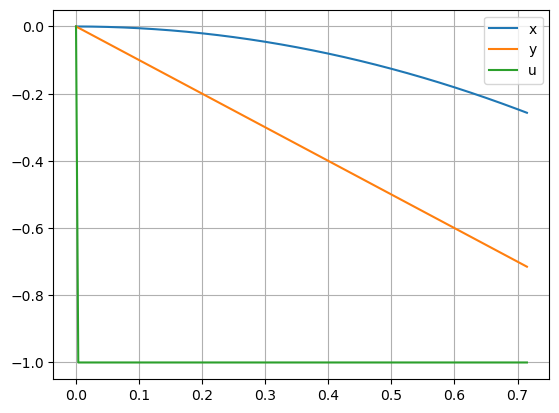

In [21]:
print("T* =", T.value[0])
print("y(T) =", y.value[-1])

t = np.linspace(0, T.value[0], nt)
plt.plot(t, x.value, label='x')
plt.plot(t, y.value, label='y')
plt.plot(t, u.value, label='u')
plt.legend(); plt.grid(); plt.show()

### Contrôle d’insectes. 

#### Contrôle optimal en temps minimal

Objectif :
$$
\min T \quad \text{s.c.}\quad x(T)=a, y(T)=1,\quad a\in[1,3].
$$
Le problème est résolu par pénalisation des conditions terminales.
Le contrôle optimal tend à saturer les bornes admissibles.

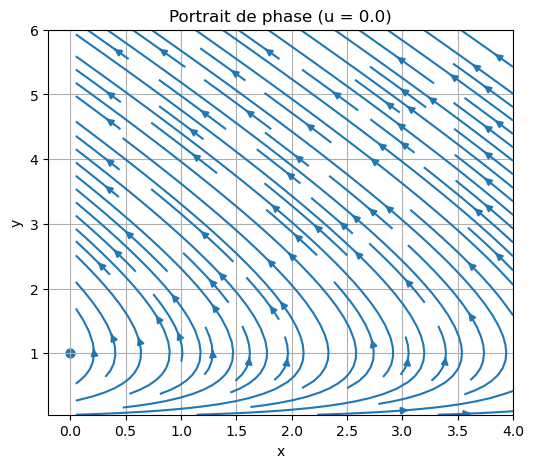

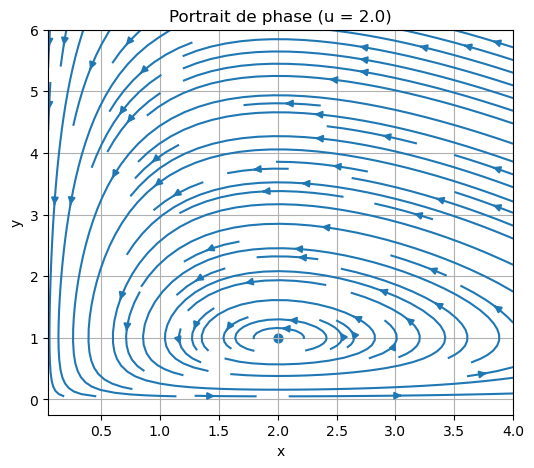

In [22]:
def phase_portrait(u_const=2.0, xlim=(0.05, 4.0), ylim=(0.05, 6.0), n=25):
    xs = np.linspace(xlim[0], xlim[1], n)
    ys = np.linspace(ylim[0], ylim[1], n)
    X, Y = np.meshgrid(xs, ys)

    dX = X * (1 - Y)
    dY = Y * (X - u_const)

    plt.figure(figsize=(6,5))
    plt.streamplot(X, Y, dX, dY, density=1.0)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Portrait de phase (u = {u_const})")
    plt.grid(True)

    plt.scatter([u_const], [1.0], s=40)
    plt.show()

phase_portrait(u_const=0.0)
phase_portrait(u_const=2.0)


#### Contrôle optimal en temps minimal

==== Insects: min time ====
a = 2.5
T* = 3.3797771314
x(T) = 2.5001173584
y(T) = 0.99935512712


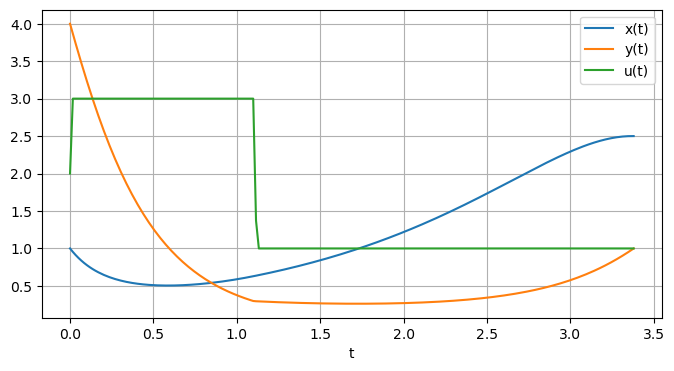

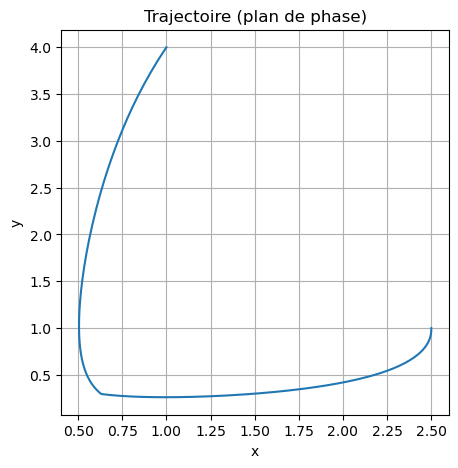

(3.3797771314,
 [1.0, 0.95380036562, 0.91167176111, 0.87323139769, 0.83813557875, 0.80607585448, 0.77677546667, 0.749986091, 0.72548487282, 0.70307174491, 0.68256701097, 0.6638091762, 0.64665300477, 0.63096778443, 0.61663577841, 0.60355084621, 0.59161721587, 0.5807483916, 0.57086618228, 0.56189983743, 0.55378527873, 0.54646441638, 0.5398845407, 0.5339977804, 0.52876061999, 0.52413346956, 0.52008028101, 0.51656820539, 0.51356728676, 0.51105018842, 0.50899194783, 0.50736975711, 0.50616276615, 0.50535190597, 0.50491972992, 0.50485027098, 0.50512891326, 0.50574227621, 0.50667811022, 0.50792520237, 0.5094732913, 0.51131299013, 0.51343571679, 0.51583363083, 0.51849957613, 0.5214270289, 0.52461005047, 0.52804324432, 0.53172171702, 0.53564104262, 0.53979723027, 0.5441866946, 0.54880622875, 0.55365297973, 0.55872442589, 0.5640183563, 0.56953285196, 0.57526626848, 0.58121722036, 0.58738456644, 0.59376739669, 0.60036502001, 0.60717695308, 0.6142029101, 0.62144279345, 0.628896685, 0.63647981451, 0

In [23]:
def solve_insects_min_time(a=2.0, nt=201, W=1e5, T0=2.0):
    m = GEKKO(remote=False)
    m.time = np.linspace(0, 1, nt)

    x = m.Var(value=1.0, lb=1e-8)
    y = m.Var(value=4.0, lb=1e-8)

    p = np.zeros(nt); p[-1] = 1.0
    final = m.Param(value=p)

    T = m.FV(value=T0, lb=0.1, ub=50.0)
    T.STATUS = 1

    u = m.MV(value=2.0, lb=1.0, ub=3.0)
    u.STATUS = 1

    m.Equation(x.dt() == T * (x*(1-y)))
    m.Equation(y.dt() == T * (y*(x-u)))

    m.Minimize(W * (final*(x-a))**2)
    m.Minimize(W * (final*(y-1))**2)

    m.Minimize(T)

    m.options.IMODE  = 6
    m.options.SOLVER = 3
    m.solve(disp=False)

    t = np.linspace(0, T.value[0], nt)

    print("==== Insects: min time ====")
    print("a =", a)
    print("T* =", T.value[0])
    print("x(T) =", x.value[-1])
    print("y(T) =", y.value[-1])

    plt.figure(figsize=(8,4))
    plt.plot(t, x.value, label='x(t)')
    plt.plot(t, y.value, label='y(t)')
    plt.plot(t, u.value, label='u(t)')
    plt.xlabel("t")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(5,5))
    plt.plot(x.value, y.value)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Trajectoire (plan de phase)")
    plt.grid(True)
    plt.show()

    return T.value[0], x.value, y.value, u.value

solve_insects_min_time(a=2.5)

#### Ajout d’un coût $L^2$ sur le contrôle

==== Insects: T + gamma*||u||_L2^2 ====
a = 2.5  gamma = 0.01
T* = 3.3797760075
x(T) = 2.5001173444
y(T) = 0.99935338629
∫u^2 dt ≈ 12.182042377


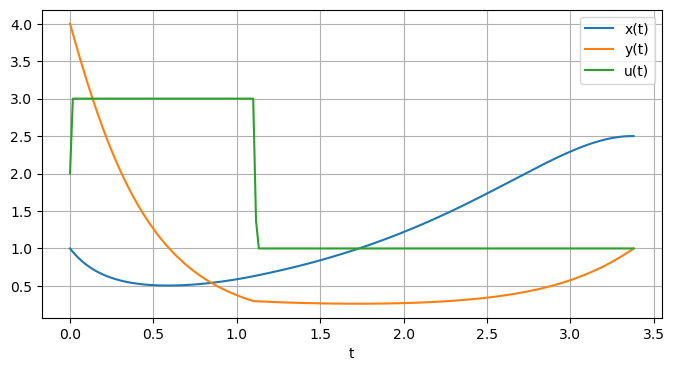

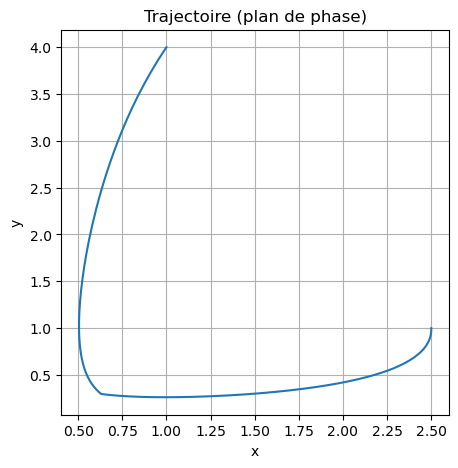

(3.3797760075,
 12.182042377,
 [1.0, 0.9538003796, 0.91167178659, 0.87323143255, 0.83813562116, 0.80607590287, 0.7767755197, 0.74998614752, 0.72548493183, 0.70307180556, 0.68256707254, 0.66380923805, 0.64665306638, 0.63096784532, 0.61663583818, 0.60355090453, 0.59161727242, 0.58074844613, 0.57086623456, 0.56189988725, 0.55378532593, 0.5464644608, 0.5398845822, 0.53399781885, 0.52876065528, 0.52413350159, 0.52008030969, 0.51656823063, 0.51356730849, 0.51105020655, 0.50899196228, 0.50736976781, 0.50616277303, 0.50535190896, 0.50491972895, 0.50485026599, 0.50512890417, 0.50574226295, 0.50667809272, 0.50792518056, 0.50947326511, 0.51131295948, 0.5134356816, 0.51583359102, 0.51849953162, 0.5214269796, 0.52460999631, 0.5280431852, 0.53172165284, 0.5356409733, 0.53979715571, 0.54418661469, 0.5488061434, 0.55365288883, 0.55872432932, 0.56401825396, 0.56953274373, 0.57526615424, 0.58121709999, 0.58738443981, 0.59376726368, 0.60036488048, 0.60717680689, 0.61420275712, 0.62144263353, 0.6288965179

In [24]:
def solve_insects_time_plus_L2(a=2.0, gamma=1e-2, nt=201, W=1e5, T0=2.0):
    m = GEKKO(remote=False)
    m.time = np.linspace(0, 1, nt)

    x = m.Var(value=1.0, lb=1e-8)
    y = m.Var(value=4.0, lb=1e-8)
    s = m.Var(value=0.0, lb=0.0)

    p = np.zeros(nt); p[-1] = 1.0
    final = m.Param(value=p)

    T = m.FV(value=T0, lb=0.1, ub=50.0)
    T.STATUS = 1

    u = m.MV(value=2.0, lb=1.0, ub=3.0)
    u.STATUS = 1

    m.Equation(x.dt() == T * (x*(1-y)))
    m.Equation(y.dt() == T * (y*(x-u)))
    m.Equation(s.dt() == T * (u**2))

    m.Minimize(W * (final*(x-a))**2)
    m.Minimize(W * (final*(y-1))**2)

    m.Minimize(T)
    m.Minimize(gamma * (final*s))

    m.options.IMODE  = 6
    m.options.SOLVER = 3
    m.solve(disp=False)

    t = np.linspace(0, T.value[0], nt)

    print("==== Insects: T + gamma*||u||_L2^2 ====")
    print("a =", a, " gamma =", gamma)
    print("T* =", T.value[0])
    print("x(T) =", x.value[-1])
    print("y(T) =", y.value[-1])
    print("∫u^2 dt ≈", s.value[-1])

    plt.figure(figsize=(8,4))
    plt.plot(t, x.value, label='x(t)')
    plt.plot(t, y.value, label='y(t)')
    plt.plot(t, u.value, label='u(t)')
    plt.xlabel("t")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(5,5))
    plt.plot(x.value, y.value)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Trajectoire (plan de phase)")
    plt.grid(True)
    plt.show()

    return T.value[0], s.value[-1], x.value, y.value, u.value

solve_insects_time_plus_L2(a=2.5, gamma=1e-2)
